In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../data/curated/outliers_removed.csv')
data = data[['Postcode', 'Baths', 'Income', 'Parking', 'Bedrooms','Count_Shopping_Center','Weekly Rental Price']]

data

,Postcode,Baths,Income,Parking,Bedrooms,Count_Shopping_Center,Weekly Rental Price
0,3000,1,38674.046186,1,1,18.0,440.0
1,3000,2,38674.046186,1,2,18.0,650.0
2,3000,1,38674.046186,0,1,18.0,440.0
3,3000,1,38674.046186,0,1,18.0,320.0
4,3000,2,38674.046186,0,2,18.0,700.0
...,...,...,...,...,...,...,...
11491,3996,2,52284.246429,2,3,0.0,600.0
11492,3996,2,52284.246429,0,4,0.0,550.0
11493,3996,1,52284.246429,0,2,0.0,420.0
11494,3996,1,52284.246429,1,2,0.0,370.0


In [3]:
x_train = data[['Postcode', 'Baths', 'Income', 'Parking', 'Bedrooms','Count_Shopping_Center']]
y_train = data['Weekly Rental Price']

In [4]:
from sklearn.model_selection import train_test_split

# split the data into two groups that are training set and the testing set
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.3, shuffle=True)

In [5]:
# adjust parameters for the first time

# import the random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = {
    'n_estimators': [300,500],
    "max_features": ["sqrt", "log2"],
    "max_depth" : [10,20,30]
}

rf = RandomForestRegressor(random_state=42)

kfold=KFold(n_splits=5,shuffle=True,random_state=1)

cv = GridSearchCV(rf, parameters,cv=kfold)
cv.fit(x_train, y_train)

print(cv.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}


In [6]:
# adjust parameters for the second time
parameters = {
    'n_estimators': [300,500],
    "max_features": ["sqrt", "log2"],
    "max_depth" : [30,40,50]
}

rf = RandomForestRegressor(random_state=42)

kfold=KFold(n_splits=5,shuffle=True,random_state=1)

cv = GridSearchCV(rf, parameters,cv=kfold)
cv.fit(x_train, y_train)

print(cv.best_params_)

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 500}


In [7]:
# adjust parameters for the third time
parameters = {
    'n_estimators': [300,500],
    "max_features": ["sqrt", "log2"],
    "max_depth" : [10,30,50]
}

rf = RandomForestRegressor(random_state=42)

kfold=KFold(n_splits=5,shuffle=True,random_state=1)

cv = GridSearchCV(rf, parameters,cv=kfold)
cv.fit(x_train, y_train)

print(cv.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}


In [8]:
# search the parameter space
parameters = {"max_depth" : [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]}

rf = RandomForestRegressor(random_state=42,n_estimators=300,max_features='sqrt')

kfold=KFold(n_splits=5,shuffle=True,random_state=1)

cv = GridSearchCV(rf, parameters,cv=kfold)
cv.fit(x_train, y_train)

print(cv.best_params_)

{'max_depth': 13}


Text(0.5, 1.0, 'cv error for random forest')

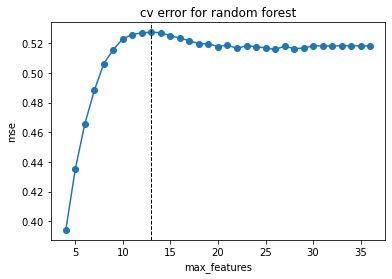

In [9]:
# plot a diagram to show the cross-validation process
cv_score=cv.cv_results_['mean_test_score'] # get the training score
plt.plot(range(4,37),cv_score,'o-')
plt.axvline(range(4,37)[np.argmax(cv_score)],linestyle='--',color='k',linewidth=1)
plt.xlabel('max_features')
plt.ylabel('mse')
plt.title('cv error for random forest')

In [5]:
# import the random forest regressor
from sklearn.ensemble import RandomForestRegressor

# instantiate model with 200 decision trees
rf = RandomForestRegressor(random_state=42,n_estimators=300,max_features='sqrt',max_depth=13)

# train the model on training data
rf.fit(x_train_split, y_train_split)
rf.score(x_test_split,y_test_split)# calculate the r squared

0.5381995106110684

In [6]:
# predict the rent for the test data
predictions = rf.predict(x_test_split)

In [7]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mae=mean_absolute_error(predictions,y_test_split)
mse=mean_squared_error(predictions,y_test_split)
mae,mse

(95.87608809406038, 35596.12030762304)

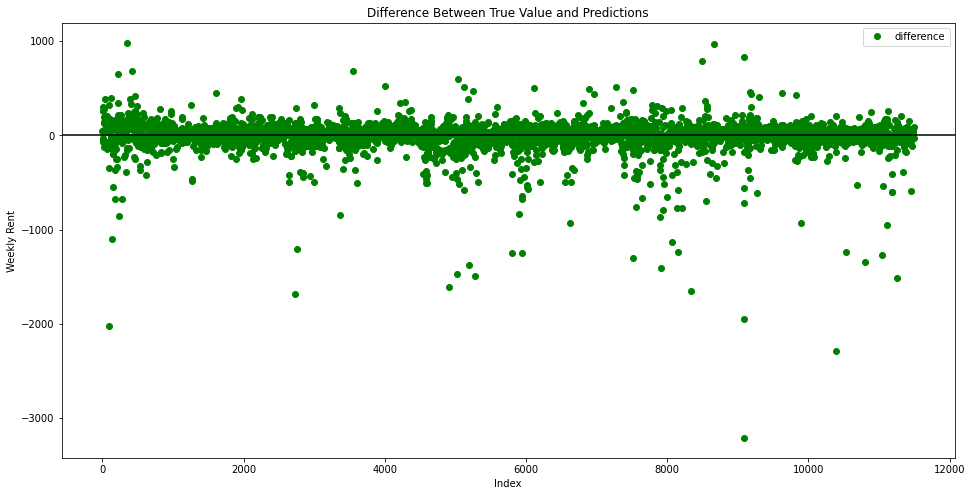

In [8]:
# plot the predictions of the random forest regressor and the true value
plt.figure(figsize=(16,8))
plt.title('Result Analysis')
plt.plot(x_test_split.index, predictions - y_test_split,'o',color = 'green',label = 'difference')

plt.axhline(y=0, color='black')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Weekly Rent')
plt.title('Difference Between True Value and Predictions')

# save the histogram
plt.savefig('../plots/rf_error.png')

plt.show()

In [9]:
# calculate the absolute errors
error = predictions - y_test_split
error = [abs(x) for x in error]

# print out the mean absolute error (mae)
np.mean(error)

95.87608809406038

In [10]:
from statistics import mode

# calculate the absolute errors of baseline model
y_mode = mode(y_test_split)
baseline_error = [abs(y_mode-x) for x in y_test_split]
np.mean(baseline_error)

169.00624506545935

In [11]:
income = pd.read_csv('../data/curated/predict_income.csv')

income

,Unnamed: 0,Postcode,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,0,3000,31480,32476,33314.0,34580.0,35894.110584,37258.160053,38674.046186,40143.738881,41669.282900,43252.800705
1,1,3002,61342,63689,67362.0,69972.0,72683.126748,75499.298489,78424.585284,81463.214891,84619.578877,87898.238965
2,2,3003,46442,49415,50578.0,51259.0,51949.169224,52648.631129,53357.510836,54075.935148,54804.032578,55541.933369
3,3,3004,59385,60776,62323.0,64457.0,66664.070231,68946.712688,71307.515039,73749.153552,76274.396138,78886.105481
4,4,3006,53857,53668,55730.0,54860.0,54003.581554,53160.532640,52330.644548,51513.711823,50709.532220,49917.906650
...,...,...,...,...,...,...,...,...,...,...,...,...
657,657,3988,42542,44433,46548.0,46832.0,47117.732749,47405.208819,47694.438846,47985.433532,48278.203643,48572.760011
658,658,3991,33915,39348,39090.0,38150.0,37232.604247,36337.269174,35463.464287,34610.671848,33778.386570,32966.115314
659,659,3992,38625,41864,41444.0,43306.0,45251.656114,47284.726853,49409.139588,51628.998142,53948.590714,56372.398163
660,660,3995,38190,39388,40803.0,41877.0,42979.269392,44110.552271,45271.612319,46463.233319,47686.219682,48941.396996


In [12]:
inc_2023 = income[['Postcode','2023']]
inc_2024 = income[['Postcode','2024']]
inc_2025 = income[['Postcode','2025']]

In [13]:
data_2023 = data.drop(columns=['Income','Weekly Rental Price'])

data_2023 = data_2023.merge(inc_2023, on='Postcode', how='left')

data_2023 = data_2023.rename(columns={'2023' : 'Income'})

order = ['Postcode','Baths','Income','Parking','Bedrooms','Count_Shopping_Center']

data_2023 = data_2023[order]

data_2023 = data_2023.fillna(40000)

data_2023


,Postcode,Baths,Income,Parking,Bedrooms,Count_Shopping_Center
0,3000,1,40143.738881,1,1,18.0
1,3000,2,40143.738881,1,2,18.0
2,3000,1,40143.738881,0,1,18.0
3,3000,1,40143.738881,0,1,18.0
4,3000,2,40143.738881,0,2,18.0
...,...,...,...,...,...,...
11491,3996,2,54359.444697,2,3,0.0
11492,3996,2,54359.444697,0,4,0.0
11493,3996,1,54359.444697,0,2,0.0
11494,3996,1,54359.444697,1,2,0.0


In [14]:
data_2024 = data.drop(columns=['Income','Weekly Rental Price'])

data_2024 = data_2024.merge(inc_2024, on='Postcode', how='left')

data_2024 = data_2024.rename(columns={'2024' : 'Income'})

order = ['Postcode','Baths','Income','Parking','Bedrooms','Count_Shopping_Center']

data_2024 = data_2024[order]

data_2024 = data_2024.fillna(40000)

data_2024

,Postcode,Baths,Income,Parking,Bedrooms,Count_Shopping_Center
0,3000,1,41669.282900,1,1,18.0
1,3000,2,41669.282900,1,2,18.0
2,3000,1,41669.282900,0,1,18.0
3,3000,1,41669.282900,0,1,18.0
4,3000,2,41669.282900,0,2,18.0
...,...,...,...,...,...,...
11491,3996,2,56517.009033,2,3,0.0
11492,3996,2,56517.009033,0,4,0.0
11493,3996,1,56517.009033,0,2,0.0
11494,3996,1,56517.009033,1,2,0.0


In [15]:
data_2025 = data.drop(columns=['Income','Weekly Rental Price'])

data_2025 = data_2025.merge(inc_2025, on='Postcode', how='left')

data_2025 = data_2025.rename(columns={'2025' : 'Income'})

order = ['Postcode','Baths','Income','Parking','Bedrooms','Count_Shopping_Center']

data_2025 = data_2025[order]

data_2025 = data_2025.fillna(40000)

data_2025

,Postcode,Baths,Income,Parking,Bedrooms,Count_Shopping_Center
0,3000,1,43252.800705,1,1,18.0
1,3000,2,43252.800705,1,2,18.0
2,3000,1,43252.800705,0,1,18.0
3,3000,1,43252.800705,0,1,18.0
4,3000,2,43252.800705,0,2,18.0
...,...,...,...,...,...,...
11491,3996,2,58760.208604,2,3,0.0
11492,3996,2,58760.208604,0,4,0.0
11493,3996,1,58760.208604,0,2,0.0
11494,3996,1,58760.208604,1,2,0.0


In [16]:
data_2023['Pred_2023'] = rf.predict(data_2023)
data_2024['Pred_2024'] = rf.predict(data_2024)
data_2025['Pred_2025'] = rf.predict(data_2025)

In [17]:
data_2023 = data_2023[['Pred_2023']]
data_2024 = data_2024[['Pred_2024']]
data_2025 = data_2025[['Pred_2025']]

In [18]:
data = pd.concat([data,data_2023], axis=1)

data = pd.concat([data,data_2024], axis=1)

data = pd.concat([data,data_2025], axis=1)

data

,Postcode,Baths,Income,Parking,Bedrooms,Count_Shopping_Center,Weekly Rental Price,Pred_2023,Pred_2024,Pred_2025
0,3000,1,38674.046186,1,1,18.0,440.0,475.648521,477.100188,476.993521
1,3000,2,38674.046186,1,2,18.0,650.0,719.722309,730.223698,720.025430
2,3000,1,38674.046186,0,1,18.0,440.0,434.661411,436.608316,436.681828
3,3000,1,38674.046186,0,1,18.0,320.0,434.661411,436.608316,436.681828
4,3000,2,38674.046186,0,2,18.0,700.0,646.275830,657.210066,646.132606
...,...,...,...,...,...,...,...,...,...,...
11491,3996,2,52284.246429,2,3,0.0,600.0,481.205824,485.539174,518.962592
11492,3996,2,52284.246429,0,4,0.0,550.0,490.094922,509.435959,526.168466
11493,3996,1,52284.246429,0,2,0.0,420.0,456.365213,452.827442,450.956985
11494,3996,1,52284.246429,1,2,0.0,370.0,393.641601,404.420889,419.420067


In [19]:
data['rate_2023'] = (data['Pred_2023'] - data['Weekly Rental Price'])/data['Weekly Rental Price']
data['rate_2024'] = (data['Pred_2024'] - data['Pred_2023'])/data['Pred_2023']
data['rate_2025'] = (data['Pred_2025'] - data['Pred_2024'])/data['Pred_2024']
data

,Postcode,Baths,Income,Parking,Bedrooms,Count_Shopping_Center,Weekly Rental Price,Pred_2023,Pred_2024,Pred_2025,rate_2023,rate_2024,rate_2025
0,3000,1,38674.046186,1,1,18.0,440.0,475.648521,477.100188,476.993521,0.081019,0.003052,-0.000224
1,3000,2,38674.046186,1,2,18.0,650.0,719.722309,730.223698,720.025430,0.107265,0.014591,-0.013966
2,3000,1,38674.046186,0,1,18.0,440.0,434.661411,436.608316,436.681828,-0.012133,0.004479,0.000168
3,3000,1,38674.046186,0,1,18.0,320.0,434.661411,436.608316,436.681828,0.358317,0.004479,0.000168
4,3000,2,38674.046186,0,2,18.0,700.0,646.275830,657.210066,646.132606,-0.076749,0.016919,-0.016855
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11491,3996,2,52284.246429,2,3,0.0,600.0,481.205824,485.539174,518.962592,-0.197990,0.009005,0.068838
11492,3996,2,52284.246429,0,4,0.0,550.0,490.094922,509.435959,526.168466,-0.108918,0.039464,0.032845
11493,3996,1,52284.246429,0,2,0.0,420.0,456.365213,452.827442,450.956985,0.086584,-0.007752,-0.004131
11494,3996,1,52284.246429,1,2,0.0,370.0,393.641601,404.420889,419.420067,0.063896,0.027384,0.037088


In [ ]:
data.to_csv("../data/curated/RFpredi.csv")